In [1]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from dataset import *
from models import ResNet18, ResNet50
import medmnist
from medmnist import INFO, Evaluator
from medmnist import BloodMNIST

import os
from collections import OrderedDict
from copy import deepcopy

import numpy as np
from torch.utils.tensorboard import SummaryWriter
from torchvision.models import resnet18, resnet34, resnet50
from torchvision.models import swin_v2_t
from torchvision.models import convnext_small
from torchvision.models import vit_b_16
from torchvision.models import efficientnet_v2_s
from torchvision.models import inception_v3
from torchvision.models import swin_v2_s



The ``converters`` are currently experimental. It may not support operations including (but not limited to) Functions in ``torch.nn.functional`` that involved data dimension


Using downloaded and verified file: /Users/vemundlund/.medmnist/bloodmnist.npz
Using downloaded and verified file: /Users/vemundlund/.medmnist/bloodmnist.npz
Using downloaded and verified file: /Users/vemundlund/.medmnist/bloodmnist.npz
Running iteration 0 of 6


/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.4694878485925654
cur_best_auc: 0.988411279591223
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.2581649188031542
Epoch 2 of 24
Epoch loss 0.2131841353913571
cur_best_auc: 0.9912795800984494
cur_best_epoch 2
Epoch 3 of 24
Epoch loss 0.19220836627039503
cur_best_auc: 0.9954934819081374
cur_best_epoch 3
Epoch 4 of 24
Epoch loss 0.17888817912403573
Epoch 5 of 24
Epoch loss 0.15865668408731196
cur_best_auc: 0.996814149834567
cur_best_epoch 5
Epoch 6 of 24
Epoch loss 0.15494951058892495
Epoch 7 of 24
Epoch loss 0.13838800875113366
cur_best_auc: 0.9968344181244522
cur_best_epoch 7
Epoch 8 of 24
Epoch loss 0.12359120827564533
cur_best_auc: 0.996949890895016
cur_best_epoch 8
Epoch 9 of 24
Epoch loss 0.11539083703401241
Epoch 10 of 24
Epoch loss 0.11047735445676966
cur_best_auc: 0.9973815726089617
cur_best_epoch 10
Epoch 11 of 24
Epoch loss 0.10520642857126733
cur_best_auc: 0.9977809412203404
cur_best_epoch 11
Epoch 12 of 24
Epoch loss 0.1065748746090747
cur_best_auc: 0.9

/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.6257039895083042
cur_best_auc: 0.9915584011660611
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.24242728266944277
cur_best_auc: 0.9956480965134172
cur_best_epoch 1
Epoch 2 of 24
Epoch loss 0.1879515085924179
cur_best_auc: 0.9962420582646245
cur_best_epoch 2
Epoch 3 of 24
Epoch loss 0.1514874453795083
cur_best_auc: 0.9968524266014261
cur_best_epoch 3
Epoch 4 of 24
Epoch loss 0.13101891000220117
cur_best_auc: 0.9977009104343859
cur_best_epoch 4
Epoch 5 of 24
Epoch loss 0.11677930722052747
Epoch 6 of 24
Epoch loss 0.10263396763896689
cur_best_auc: 0.9982339351797649
cur_best_epoch 6
Epoch 7 of 24
Epoch loss 0.09675425703221179
Epoch 8 of 24
Epoch loss 0.08610336127829679
Epoch 9 of 24
Epoch loss 0.07424745536310241
Epoch 10 of 24
Epoch loss 0.07513325314651778
cur_best_auc: 0.9983346794733436
cur_best_epoch 10
Epoch 11 of 24
Epoch loss 0.07289409025156117
Epoch 12 of 24
Epoch loss 0.06657700325818137
Epoch 13 of 24
Epoch loss 0.06112451573952715
Epoch 14 of 24
Epo

/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.47918399534326916
cur_best_auc: 0.9911972359935423
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.26249600265254364
Epoch 2 of 24
Epoch loss 0.2347978281372405
cur_best_auc: 0.9942211972218347
cur_best_epoch 2
Epoch 3 of 24
Epoch loss 0.1890134092499601
Epoch 4 of 24
Epoch loss 0.1721946693005714
cur_best_auc: 0.9959771916077202
cur_best_epoch 4
Epoch 5 of 24
Epoch loss 0.16486186248824952
Epoch 6 of 24
Epoch loss 0.26590526516133167
Epoch 7 of 24
Epoch loss 0.19263274856704346
Epoch 8 of 24
Epoch loss 0.1538047378367566
cur_best_auc: 0.9972845656576068
cur_best_epoch 8
Epoch 9 of 24
Epoch loss 0.14239644239399027
Epoch 10 of 24
Epoch loss 0.12494786309593535
cur_best_auc: 0.9976742331498968
cur_best_epoch 10
Epoch 11 of 24
Epoch loss 0.11389448012205515
Epoch 12 of 24
Epoch loss 0.11316176951724163
cur_best_auc: 0.9980647330994772
cur_best_epoch 12
Epoch 13 of 24
Epoch loss 0.10954115591309171
Epoch 14 of 24
Epoch loss 0.10778656597942748
Epoch 15 of 24
Epoch l

/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.6234514855958045
cur_best_auc: 0.9894326824256461
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.2428381345532042
cur_best_auc: 0.9957254834530592
cur_best_epoch 1
Epoch 2 of 24
Epoch loss 0.1825187569285961
cur_best_auc: 0.9964323083389199
cur_best_epoch 2
Epoch 3 of 24
Epoch loss 0.1464072805928423
cur_best_auc: 0.9974235372624631
cur_best_epoch 3
Epoch 4 of 24
Epoch loss 0.1255465299287375
cur_best_auc: 0.9975818337893008
cur_best_epoch 4
Epoch 5 of 24
Epoch loss 0.11609016665990682
Epoch 6 of 24
Epoch loss 0.09887754374203529
cur_best_auc: 0.997909039629146
cur_best_epoch 6
Epoch 7 of 24
Epoch loss 0.09319428869701446
cur_best_auc: 0.9980080103531879
cur_best_epoch 7
Epoch 8 of 24
Epoch loss 0.09020836318426943
cur_best_auc: 0.9983795942495328
cur_best_epoch 8
Epoch 9 of 24
Epoch loss 0.0818753183839169
Epoch 10 of 24
Epoch loss 0.0756583531050289
Epoch 11 of 24
Epoch loss 0.07103131784799885
Epoch 12 of 24
Epoch loss 0.06005490170989899
cur_best_auc: 0.9985

/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.4638120394120825
cur_best_auc: 0.9852120437926857
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.26090964825546487
cur_best_auc: 0.9920799835338864
cur_best_epoch 1
Epoch 2 of 24
Epoch loss 0.21027258989658762
Epoch 3 of 24
Epoch loss 0.19296843174131625
cur_best_auc: 0.9963596942903794
cur_best_epoch 3
Epoch 4 of 24
Epoch loss 0.1712007444114127
Epoch 5 of 24
Epoch loss 0.17097309532951802
Epoch 6 of 24
Epoch loss 0.1471180322560224
cur_best_auc: 0.99763911482652
cur_best_epoch 6
Epoch 7 of 24
Epoch loss 0.14337937930162917
Epoch 8 of 24
Epoch loss 0.12600135529770495
Epoch 9 of 24
Epoch loss 0.11887417024278894
cur_best_auc: 0.9982109863791566
cur_best_epoch 9
Epoch 10 of 24
Epoch loss 0.10369536676939498
Epoch 11 of 24
Epoch loss 0.11524273538367545
Epoch 12 of 24
Epoch loss 0.10496148413562394
Epoch 13 of 24
Epoch loss 0.13964760279718866
Epoch 14 of 24
Epoch loss 0.10961515610997981
Epoch 15 of 24
Epoch loss 0.10184209030914179
Epoch 16 of 24
Epoch loss 0.0

/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.6385580142761799
cur_best_auc: 0.9927437809399384
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.23524720150422543
cur_best_auc: 0.9959060656868873
cur_best_epoch 1
Epoch 2 of 24
Epoch loss 0.17843961541322953
cur_best_auc: 0.9966008574809057
cur_best_epoch 2
Epoch 3 of 24
Epoch loss 0.1581817819003729
cur_best_auc: 0.9977440238370135
cur_best_epoch 3
Epoch 4 of 24
Epoch loss 0.12156720007670686
Epoch 5 of 24
Epoch loss 0.11613114419928257
Epoch 6 of 24
Epoch loss 0.10692691327409541
cur_best_auc: 0.998242228250404
cur_best_epoch 6
Epoch 7 of 24
Epoch loss 0.09046999636561946
cur_best_auc: 0.9982987358821609
cur_best_epoch 7
Epoch 8 of 24
Epoch loss 0.08727891889816904
Epoch 9 of 24
Epoch loss 0.07801647348567209
Epoch 10 of 24
Epoch loss 0.06786219131677075
Epoch 11 of 24
Epoch loss 0.06703022732696634
Epoch 12 of 24
Epoch loss 0.06394834109046992
cur_best_auc: 0.9983391899884329
cur_best_epoch 12
Epoch 13 of 24
Epoch loss 0.059686718429339695
Epoch 14 of 24
Ep

/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.47551113826797364
cur_best_auc: 0.9914408521267867
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.26204033180120145
cur_best_auc: 0.9934310888914974
cur_best_epoch 1
Epoch 2 of 24
Epoch loss 0.2190896193397806
Epoch 3 of 24
Epoch loss 0.18915378048698953
cur_best_auc: 0.9957593538462985
cur_best_epoch 3
Epoch 4 of 24
Epoch loss 0.17514049634337425
cur_best_auc: 0.9970769618477008
cur_best_epoch 4
Epoch 5 of 24
Epoch loss 0.16110069177886274
Epoch 6 of 24
Epoch loss 0.14713895927242776
Epoch 7 of 24
Epoch loss 0.1352108617887852
Epoch 8 of 24
Epoch loss 0.13558803922793966
Epoch 9 of 24
Epoch loss 0.12172185554307827
cur_best_auc: 0.9971360536297011
cur_best_epoch 9
Epoch 10 of 24
Epoch loss 0.11645378453775923
Epoch 11 of 24
Epoch loss 0.11699507742169056
Epoch 12 of 24
Epoch loss 0.11105804119576165
cur_best_auc: 0.9983768195813729
cur_best_epoch 12
Epoch 13 of 24
Epoch loss 0.10463333236885831
Epoch 14 of 24
Epoch loss 0.09549119719799529
Epoch 15 of 24
Epoch 

/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0 of 24
Epoch loss 0.5988981267239185
cur_best_auc: 0.991217516628964
cur_best_epoch 0
Epoch 1 of 24
Epoch loss 0.23786022403138748
cur_best_auc: 0.9951233858442271
cur_best_epoch 1
Epoch 2 of 24
Epoch loss 0.17851265535709707
cur_best_auc: 0.9966291507309916
cur_best_epoch 2
Epoch 3 of 24
Epoch loss 0.1529656579678363
cur_best_auc: 0.9974999317435388
cur_best_epoch 3
Epoch 4 of 24
Epoch loss 0.1423617299804662
Epoch 5 of 24
Epoch loss 0.12399323948441034
cur_best_auc: 0.9982671480439685
cur_best_epoch 5
Epoch 6 of 24
Epoch loss 0.09509364852404341
Epoch 7 of 24
Epoch loss 0.09115422029603035
Epoch 8 of 24
Epoch loss 0.09159561078202852
Epoch 9 of 24
Epoch loss 0.07899238753746798
cur_best_auc: 0.9982984369422101
cur_best_epoch 9
Epoch 10 of 24
Epoch loss 0.07611777403570236
Epoch 11 of 24
Epoch loss 0.060770794174614104
Epoch 12 of 24
Epoch loss 0.06024456053892983
Epoch 13 of 24
Epoch loss 0.06459484969642251
Epoch 14 of 24
Epoch loss 0.050869585658879356
Epoch 15 of 24
Epoch l

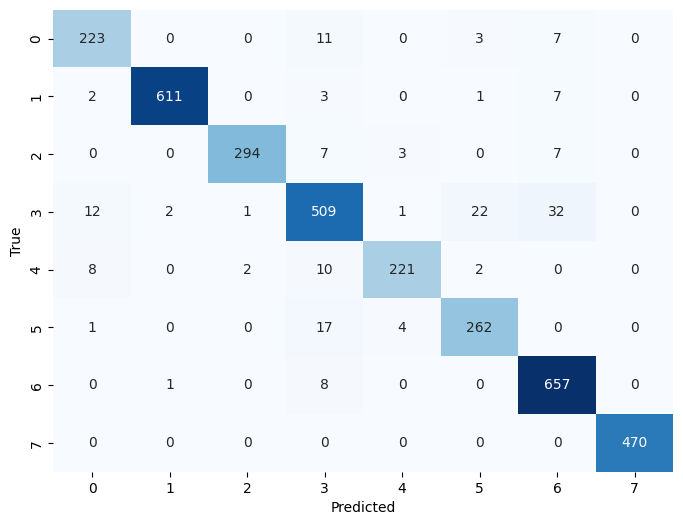

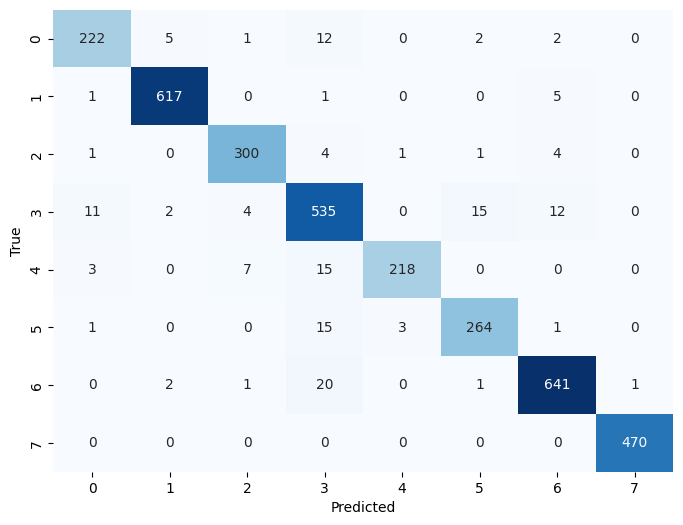

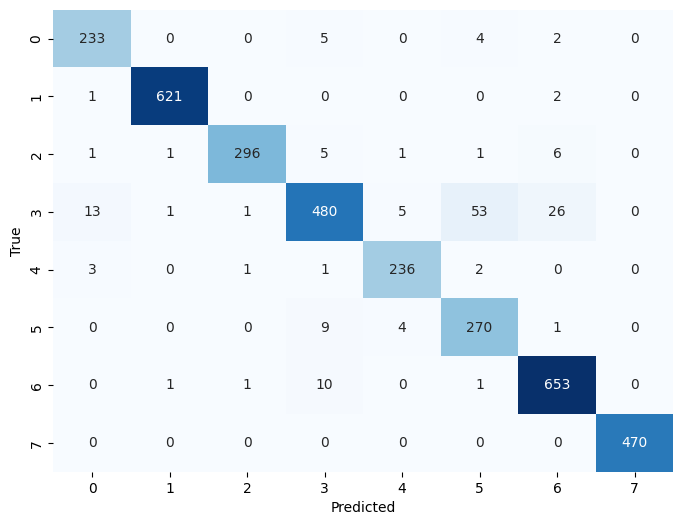

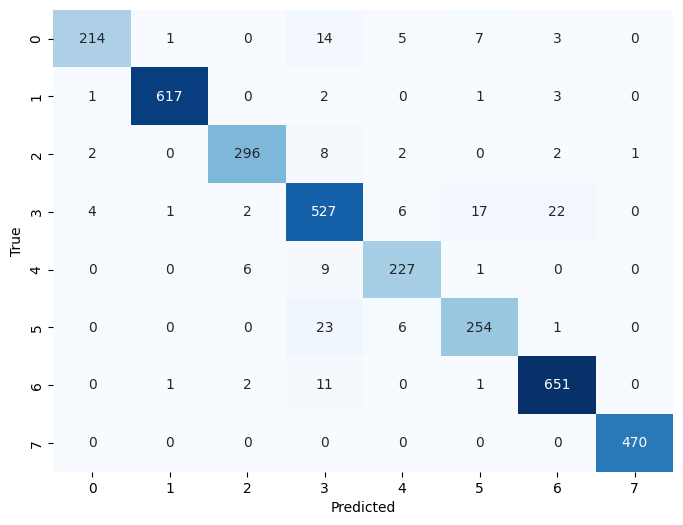

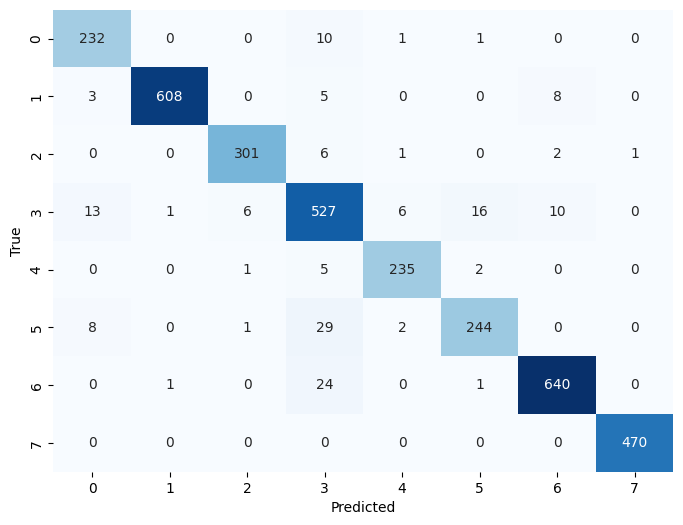

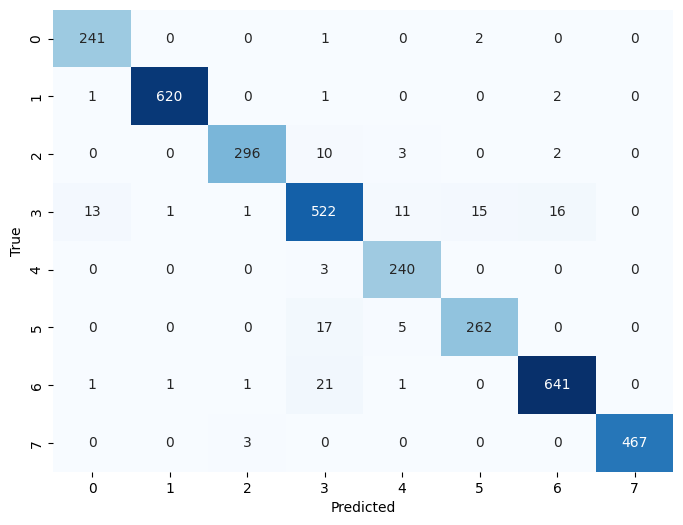

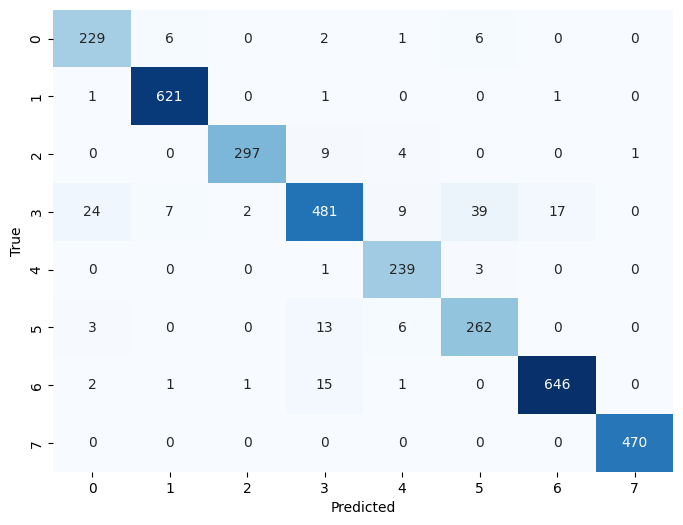

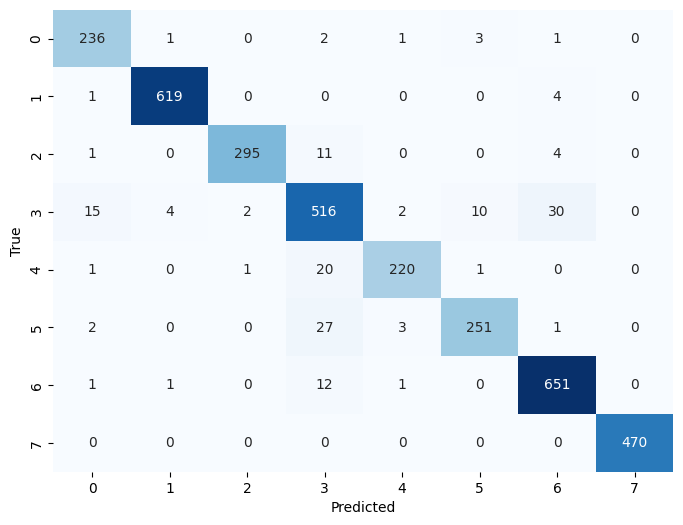

In [2]:
data_flag = 'bloodmnist'
download = True

DEVICE = 'mps'
NUM_EPOCHS = 25
BATCH_SIZE = 128
milestones = [0.5 * NUM_EPOCHS, 0.75 * NUM_EPOCHS]
lr = 0.001
gamma = 0.1

output_root = './output2d'

info = INFO[data_flag]
n_channels = info['n_channels']
n_classes = len(info['label'])
task = info['task']
augmentations = 'randomHflip_randomVflip_normalize'

bs_list = [32, 64, 128, 256]
lr_list = [0.001, 0.0001]

train_loader, train_loader_at_eval, val_loader, test_loader = extract_data(data_flag, download, BATCH_SIZE)
hyperparameters = f'g:{gamma}_eps{NUM_EPOCHS}_bs{BATCH_SIZE}_lr{lr}_aug{augmentations}'

# model = resnet18(pretrained=True)
# model.fc.out_features = n_classes
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, n_classes)
# model.name = 'resnet18'

# model = resnet34(pretrained=True)
# model.fc.out_features = n_classes
# num_ftrs = model.fc.in_features
# model.fc = nn.Linear(num_ftrs, n_classes)
# model.name = 'resnet34'

# model2 = resnet34(pretrained=True)
# model2.fc = nn.Linear(num_ftrs, n_classes)

# train_2d_model(model, DEVICE, data_flag, milestones, gamma, output_root, task, train_loader, train_loader_at_eval, val_loader, test_loader, NUM_EPOCHS, lr, hyperparameters)
# plot_confusion_matrix(model2, model.name, test_loader, hyperparameters, output_root)

counter = 0
for i in range(len(bs_list)):
    for j in range(len(lr_list)):
        print(f"Running iteration {counter} of {len(bs_list + lr_list)}")
        counter += 1
        bs = bs_list[i]
        lr = lr_list[j]
        hyperparameters = f'g:{gamma}_eps{NUM_EPOCHS}_bs{bs}_lr{lr}_aug{augmentations}'

        model = resnet34(pretrained=True)
        model.fc.out_features = n_classes
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, n_classes)
        model.name = 'resnet34'

        model2 = resnet34(pretrained = True)
        model2.fc = nn.Linear(num_ftrs, n_classes)
        train_2d_model(model, DEVICE, data_flag, milestones, gamma, output_root, task, train_loader, train_loader_at_eval, val_loader, test_loader, NUM_EPOCHS, lr, hyperparameters)
        plot_confusion_matrix(model2, model.name, test_loader, hyperparameters, output_root)

# model = convnext_small(weights=True)
# print(model.classifier)
# model.classifier[2] = nn.Linear(768, n_classes)
# model.name = 'convnext_small'

# model = vit_b_16(pretrained=True)
# model.heads = nn.Linear(768, n_classes)
# model.name = 'vit_b_16'


# model = efficientnet_v2_s(pretrained=True)
# model.classifier[1] = nn.Linear(1280, n_classes)
# model.name = 'efficientnet_v2_s'

# model = inception_v3(pretrained=True)
# model.fc = nn.Linear(2048, n_classes)
# model.name = 'inception_v3'

# model = swin_v2_s(pretrained=True)
# model.head = nn.Linear(768, n_classes)
# model.name = 'swin_v2_s'

# OWN
# model = ResNet18(in_channels=n_channels, num_classes=n_classes)

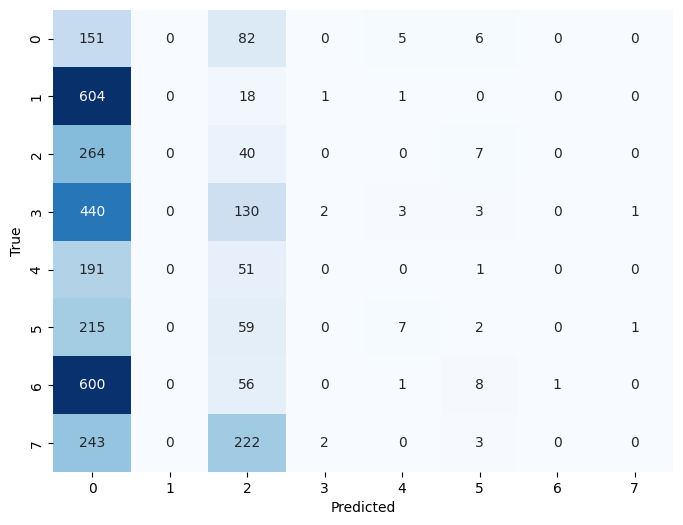

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# DataClass = getattr(medmnist, info['python_class'])

# data_transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[.5], std=[.5])
# ])

# train_dataset = DataClass(split='train', transform=data_transform, download=download)
# val_dataset = DataClass(split='val', transform=data_transform, download=download)
# test_dataset = DataClass(split='test', transform=data_transform, download=download)

model = resnet34(pretrained=True)
model.fc.out_features = n_classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, n_classes)

# print(f'./output2d/{model.name}_best_model_{hyperparameters}.pth')
model.load_state_dict(torch.load(f'./output2d/resnet34_best_model_{hyperparameters}.pth'))
model.eval()

all_true_labels = []
all_pred_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        
        _, predicted = torch.max(outputs, 1)

        all_true_labels.extend(torch.squeeze(targets, 1).long())
        all_pred_labels.extend(predicted.cpu().numpy())

y_true = np.array(all_true_labels)
y_pred = np.array(all_pred_labels)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [3]:
%reload_ext tensorboard
%tensorboard --logdir 'output2d'
from tensorboard import notebook
notebook.list()


Known TensorBoard instances:
  - port 6007: logdir output2d (started 0:00:01 ago; pid 11908)
